In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)


In [2]:
from sklearn.metrics import roc_curve,roc_auc_score

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


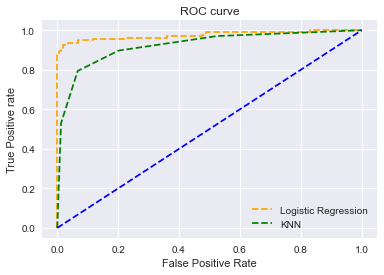

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [4]:
print(fpr1, tpr1)

[0.         0.         0.         0.00609756 0.00609756 0.01219512
 0.01219512 0.01829268 0.01829268 0.03658537 0.03658537 0.06707317
 0.06707317 0.11585366 0.11585366 0.2195122  0.2195122  0.3597561
 0.3597561  0.47560976 0.47560976 0.48780488 0.48780488 0.82926829
 0.82926829 1.        ] [0.         0.00735294 0.875      0.875      0.89705882 0.89705882
 0.90441176 0.90441176 0.92647059 0.92647059 0.93382353 0.93382353
 0.94852941 0.94852941 0.95588235 0.95588235 0.96323529 0.96323529
 0.97058824 0.97058824 0.97794118 0.97794118 0.99264706 0.99264706
 1.         1.        ]
